In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az

az.style.use('arviz-darkgrid')

In [3]:
# read .csv file into Dataframe
data = pd.read_csv('../../data/coffee/FTIR_instant_coffee.csv')
data.head(3)

,810.548,814.408,818.268,822.128,825.988,829.848,833.708,837.568,841.428,845.288,...,1883.624,1887.484,1891.344,1895.204,1899.064,1902.924,1906.784,1910.644,code,label
0,21.227620,21.837509,22.729975,22.517663,21.040178,19.256306,18.517982,18.347773,18.044034,17.735858,...,4.251176,4.219551,4.168709,4.129133,4.105336,4.078105,4.051912,4.042686,1,Arabica
1,10.364243,10.569554,10.448875,10.100696,9.620371,8.882499,8.415529,8.210217,7.916430,7.806151,...,1.493133,1.475563,1.464682,1.456444,1.442087,1.433698,1.425288,1.418705,1,Arabica
2,13.118324,13.507084,13.473495,12.871428,12.181919,11.239480,10.515672,10.468178,10.428742,10.212771,...,2.236715,2.214229,2.196218,2.181646,2.164602,2.146423,2.133255,2.121559,1,Arabica


In [4]:
data.tail(3)

,810.548,814.408,818.268,822.128,825.988,829.848,833.708,837.568,841.428,845.288,...,1883.624,1887.484,1891.344,1895.204,1899.064,1902.924,1906.784,1910.644,code,label
53,10.749405,10.900052,10.762435,10.228245,9.563644,9.004845,8.581591,8.273431,8.094841,8.002285,...,1.562851,1.534954,1.521573,1.511639,1.496256,1.486335,1.474770,1.461532,2,Robusta
54,10.240200,10.458991,10.436443,10.067882,9.505865,8.900373,8.447361,8.255538,8.037320,7.950678,...,1.648326,1.630143,1.614572,1.601206,1.583889,1.569594,1.557404,1.545577,2,Robusta
55,10.918806,11.371730,11.274209,10.792971,9.997847,9.218405,8.765989,8.565107,8.443501,8.343338,...,1.685697,1.668936,1.651325,1.626583,1.608403,1.601602,1.587624,1.574679,2,Robusta


In [5]:
# get header values as x-axis values for plotting
cols = data.columns.to_list()
x_val = cols[:-2]

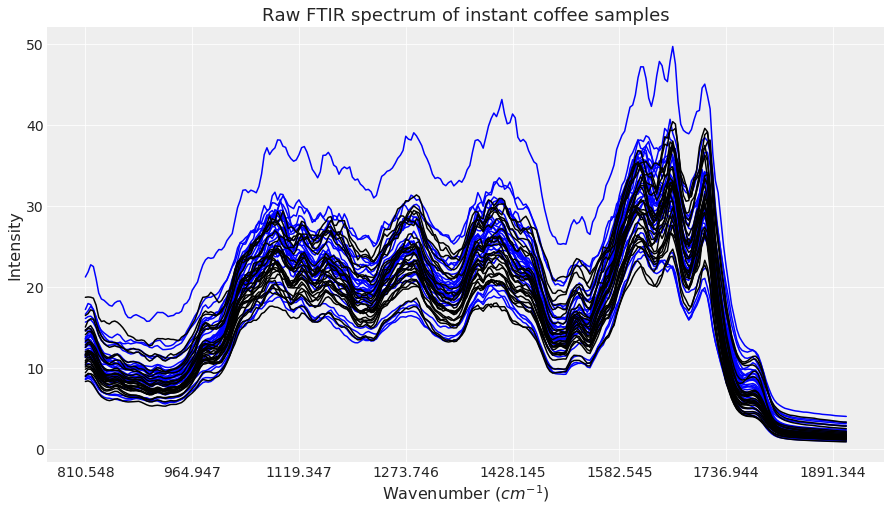

In [10]:
# plot all data in 1 figure
fig = plt.figure(figsize=(15,8))
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set(title='Raw FTIR spectrum of instant coffee samples', 
       xlabel='Wavenumber ($cm^{-1}$)', ylabel='Intensity')

plt.rc('axes', labelsize=16)
plt.rc('axes', titlesize=18)

for i in range(len(data)):
    y = data.values[i]
    if y[-2] == 1:
        col = 'blue'
    else:
        col = 'black'
    y_val = y[:-2]
    plt.plot(x_val, y_val, color=col);

In [7]:
# number of Arabica samples
len(data[data.label == 'Arabica'])

29

In [8]:
# number of Robusta samples
len(data[data.label == 'Robusta'])

27

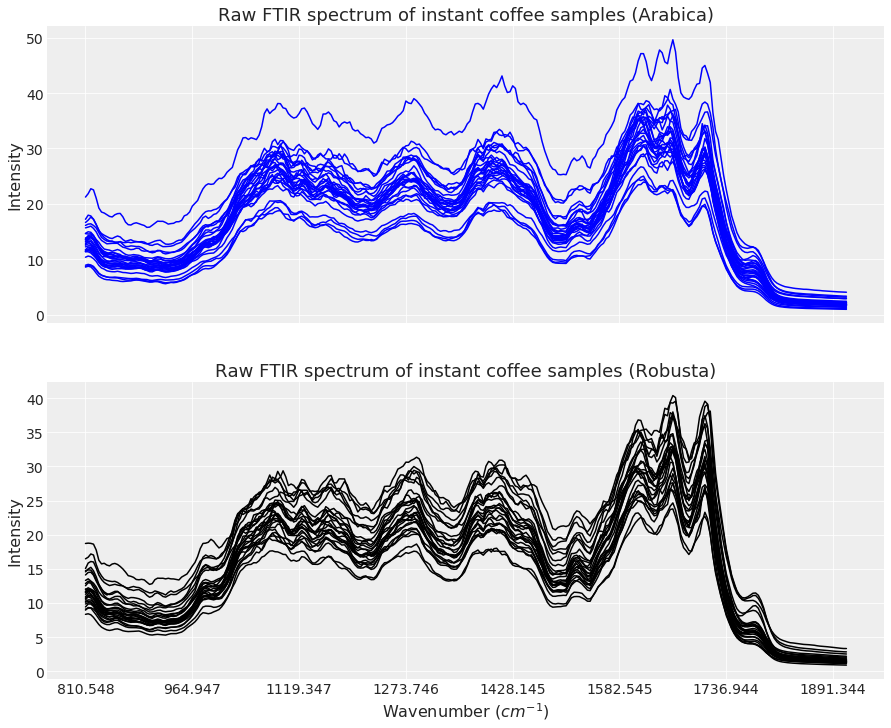

In [19]:
# plot raw samples
fig, ax = plt.subplots(2, 1, sharex='col', sharey = 'row', figsize=(15,12))
ax[0].xaxis.set_major_locator(plt.MaxNLocator(10))
ax[1].xaxis.set_major_locator(plt.MaxNLocator(10))

# label plot
ax[0].set(title='Raw FTIR spectrum of instant coffee samples (Arabica)', ylabel='Intensity')
ax[1].set(title='Raw FTIR spectrum of instant coffee samples (Robusta)', 
          xlabel='Wavenumber ($cm^{-1}$)', ylabel='Intensity')

for i in range(len(data)):
    y = data.values[i]
    y_val = y[:-2]
    if y[-2] == 1:
        ax[0].plot(x_val, y_val, color='blue');
    else:
        ax[1].plot(x_val, y_val, color='black');